## Example file for the isotopes module
This notebook presents how the isotopes.py module can be used to predict MS spectra of peptides, including some Post Translationnal Modifications

In [1]:
%matplotlib inline
import isotopes as iso

## peptides

straight pirmary sequences using 1 letter code is interpreted, a few PTM are available, check `iso.parse_peptide?` for more information

In [2]:
KEL0 = "KELCKAVSVSM"
KEL1 = "K+ELCKAVSVSM"  # + is for protonation
KEL2 = "KELCKAVS*VSM"  # * is for phosphorylation

In [3]:
print(iso.parse_peptide.__doc__)


    compute the formula of a peptide/protein given by one letter code
    
    formula = parse_peptide("ACDEY*GH")     # e.g.
    letter code is standard 1 letter code for amino-acids
    
    for xyz/abc fragmentation

    - starts is either 
        - "NH2" (default) - for a regular peptide
        - "x"  "y"  "z" - for MS fragments 
        - or any formula
    - ends is either
        - "COOH" (default) - for a regular peptide
        - "a"  "b"  "c" - for MS fragments 
        -  or any formula
    
    additional codes for Post Translational Modifications (PTM)

    * posphorylation
    a acetylation
    n amidation
    - deamidation
    h hydroxylation
    o oxydation
    + protonation
    m methoxylation
    b beta-mercaptoethanol adduct
    does not verify the chemical coherence of the PTM !
    
    if extended is True, will also interpret U : Seleno-Cysteine and U : Pyrolysine
    
    
    


In [4]:
seq = "KELCKAVSVSM"
form = iso.parse_peptide(seq)

`iso.parse_peptide(seq)` returns a `Formula`, an object handling generic chemical formula.

It has a methods for computing masses and isotopic distribution, as well as printing itself :

In [5]:
print (form)

C_50 H_91 N_13 O_16 S_2


Average and monoisotopic peptide masses

assuming no charge

In [6]:
print (form.average(), form.monoisotop())

1194.4665985002323 1193.61481589373


Let's compute $m/z$ for varying level of protonation

In [7]:
m = form.monoisotop()
mH = iso.parse_formula('H').monoisotop()           # mass of one ¹H
for n in range(1,5):
    print( "Z=%d  M/Z = %f"%(n,(m + n*mH)/n))

Z=1  M/Z = 1194.622641
Z=2  M/Z = 597.815233
Z=3  M/Z = 398.879430
Z=4  M/Z = 299.411529


`Formula` can be created easily with `iso.parse_formula()`

It is easy to a groupment to a given formula using `addformula()`

In [8]:
iso.addformula(form, iso.parse_formula("PO3"))
m = form.monoisotop()
for i in range(1,4):
    print ("Z=%d  M/Z = %f"%(i,(m+i)/i))

Z=1  M/Z = 1273.573321
Z=2  M/Z = 637.286661
Z=3  M/Z = 425.191107


But the operation is wrong, because adding a phosphate requires removing a proton,

one way to do it :

In [9]:
seq = "KELCKAVS*VSM"
form = iso.parse_peptide(seq)
m = form.monoisotop()
print(form)
for i in range(1,4):
    print ("Z=%d  M/Z = %f"%(i,(m+i)/i))

C_50 H_90 N_13 O_19 P S_2
Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165


Another, more convoluted way :

In [10]:
seq = "KELCKAVSVSM"
form = iso.parse_peptide(seq)
# fist add a full phosphate molecule
iso.addformula(form, iso.parse_formula("HPO4"))
# removing a groupement (here water group)
iso.rmformula(form, iso.parse_formula("H2O"))
m = form.monoisotop()
for i in range(1,5):
    print( "Z=%d  M/Z = %f"%(i,(m+i)/i))
    

Z=1  M/Z = 1272.565496
Z=2  M/Z = 636.782748
Z=3  M/Z = 424.855165
Z=4  M/Z = 318.891374


You can compute isotopic distribution, and even draw them

1271.565496  100.0000000000
1272.568326  62.1659202331
1273.568208  31.8682498442
1274.569089  11.7329790414
1275.569679  3.6072198284
1276.570512  0.9360617347
1277.571490  0.2114745485
1278.572655  0.0422176168
1279.573951  0.0075497937
1280.575368  0.0012228117
1281.576835  0.0001802931



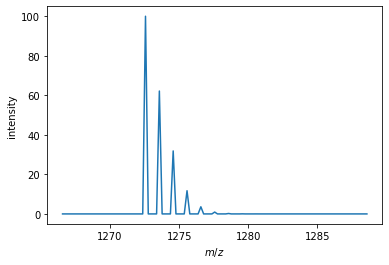

In [11]:
D = form.distribution()
print (D)
D.draw()

In [15]:
AA = "ACDEFGHIKLMNPQRSTVYW"
len(AA)
for a in AA:
    print (a,round(iso.parse_peptide(a).monoisotop(),11))

A 89.04767846841
C 121.01974946841
D 133.03750770753
E 147.05315777167
F 165.07897859669
G 75.03202840427
H 155.06947654215
I 131.09462866083
K 146.1055276977
L 131.09462866083
M 149.05104959669
N 132.05349212484
P 115.06332853255
Q 146.06914218898
R 174.1116757073
S 105.04259308797
T 119.05824315211
V 117.07897859669
Y 181.07389321625
W 204.08987763356
